# Data-Driven Strategies for a Successful Movie Studio Launch

# 🎬 Business Understanding

## 📘 Business Context
Our company is entering the competitive movie production industry by establishing a new movie studio. With major corporations increasingly investing in original video content, we need to strategically position ourselves to maximize our chances of box office success.

## 👤 Primary Stakeholder
**Head of New Movie Studio** — The key decision-maker who will use our analysis to guide the studio's content creation strategy and investment decisions.

## ❓ Key Business Questions

### 1. **What genres are most profitable?**
- Which movie genres consistently generate the highest box office returns?
- Are there emerging genres showing strong growth potential?

### 2. **What budget ranges optimize ROI?**
- What is the relationship between production budget and box office performance?
- What budget sweet spot maximizes return on investment?

### 3. **When should we release our films?**
- Which months/seasons show the strongest box office performance?
- How can we avoid oversaturated release periods?

## 🎯 Business Objectives
- **Primary Goal:** Identify the most profitable film characteristics to guide our initial movie productions.
- **Success Metrics:** Maximize box office revenue and return on investment (ROI).
- **Risk Mitigation:** Minimize financial losses by avoiding poorly-performing film categories.

## 📊 Data Requirements & Analysis Considerations

### 📂 Dataset Specifications Needed:
1. **What movie data do we have access to?** (e.g., box office numbers, budgets, genres, release dates, ratings)
2. **What time period does our data cover?** (Recent years or historical data?)
3. **Is it domestic, international, or worldwide box office gross?**

### 📎 Business Context Clarifications:
4. **What size studio are we targeting?** (Independent/small budget vs. major studio competitor?)
5. **Are there any genre restrictions?** (Family-friendly only, or open to all ratings?)
6. **Geographic focus?** (Domestic US market, international, or global?)

### 📌 Analysis Scope Considerations:
7. **Should we consider streaming/digital revenue or just theatrical box office?**
8. **Do we want to analyze competitor studios' strategies?**
9. **Should seasonal trends consider the impact of COVID-19 in recent years?**

## 📈 Success Metrics Framework

### Primary Metrics:
- **Gross Revenue:** Total box office performance
- **Return on Investment (ROI):** \((\text{Revenue} - \text{Budget}) / \text{Budget} \times 100\)
- **Profit Margins:** Net profit as percentage of revenue
- **Budget Efficiency:** Revenue per dollar invested

### Secondary Metrics:
- **Market Share:** Performance relative to industry
- **Risk Assessment:** Variance in returns by category
- **Audience Reach:** Ticket sales and demographic penetration


# 🧠 Data Understanding

To analyze what makes a movie successful, we are working with multiple datasets from trusted sources like **Box Office Mojo**, **IMDb**, **Rotten Tomatoes**, **The Movie Database (TMDb)**, and **The Numbers**. Below is an overview of each dataset and the structure of the data they contain.

---

## 🎬 `bom.movie_gross.csv.gz` (Box Office Mojo)

This dataset contains revenue data for various films.

**Columns:**
- `title`: Movie title
- `studio`: Producing studio
- `domestic_gross`: Domestic gross earnings (USD)
- `foreign_gross`: International gross earnings
- `year`: Year of release

---

## 🎥 IMDb Database (`im.db`)

This is a zipped SQLite database containing multiple related tables from IMDb. Below are the most relevant tables and their fields:

### 🔹 `directors`
- `movie_id`: Unique movie ID
- `person_id`: Director’s ID

### 🔹 `known_for`
- `person_id`: Unique person ID
- `movie_id`: Associated movie ID

### 🔹 `movie_akas`
- `movie_id`: Unique movie ID
- `ordering`: Title order
- `title`: Alternate movie title
- `region`: Country code
- `language`: Language code
- `types`: Type of title (e.g. working title, festival name)
- `attributes`: Special title attributes
- `is_original_title`: Whether it is the original title (1 = yes)

### 🔹 `movie_basics`
- `movie_id`: Unique identifier
- `primary_title`: Official movie title
- `original_title`: Title in original language
- `start_year`: Release year
- `runtime_minutes`: Duration of movie
- `genres`: Genres (comma-separated if multiple)

### 🔹 `movie_ratings`
- `movie_id`: Unique movie ID
- `averagerating`: IMDb average rating
- `numvotes`: Total number of votes

### 🔹 `persons`
- `person_id`: Unique person ID
- `primary_name`: Person's name
- `birth_year`: Year of birth
- `death_year`: Year of death (if applicable)
- `primary_profession`: Role in industry (e.g., actor, director)

### 🔹 `principals`
- `movie_id`: Unique movie ID
- `ordering`: Credit order
- `person_id`: Unique person ID
- `category`: Crew or cast category
- `job`: Specific job title
- `characters`: Character(s) played

### 🔹 `writers`
- `movie_id`: Unique movie ID
- `person_id`: Writer’s ID

---

## 🍅 `rt.movie_info.tsv.gz` (Rotten Tomatoes - Movie Info)

General information about movies.

**Columns:**
- `id`: Movie ID (RT)
- `synopsis`: Movie summary
- `rating`: MPAA Rating
- `genre`: Movie genres
- `director`: Director name(s)
- `writer`: Writer name(s)
- `theater_date`: Theatrical release date
- `dvd_date`: DVD release date
- `currency`: Currency symbol
- `box_office`: Total box office revenue
- `runtime`: Duration in minutes
- `studio`: Producing studio

---

## 📝 `rt.reviews.tsv.gz` (Rotten Tomatoes - Reviews)

Contains individual critic reviews and associated metadata.

**Columns:**
- `id`: Movie ID (RT)
- `review`: Review text
- `rating`: Rating given
- `fresh`: Review sentiment (fresh = positive, rotten = negative)
- `critic`: Name of the critic
- `top_critic`: Is the critic a "Top Critic"? (1 = yes, 0 = no)
- `publisher`: Publication name
- `date`: Review date

---

## 🎞️ `tmdb.movies.csv.gz` (The Movie Database)

Contains movie metadata and popularity data from TMDb.

**Columns:**
- `genre_ids`: List of genre IDs
- `id`: Movie ID (TMDb)
- `original_language`: Language code
- `original_title`: Title in original language
- `popularity`: Popularity score
- `release_date`: Release date
- `title`: English movie title
- `vote_average`: Average user rating
- `vote_count`: Number of votes

---

## 💰 `tn.movie_budgets.csv.gz` (The Numbers)

Contains production budget and revenue details.

**Columns:**
- `id`: Movie ID (The Numbers)
- `release_date`: Theatrical release date
- `movie`: Movie title
- `production_budget`: Budget in USD
- `domestic_gross`: Domestic earnings in USD
- `worldwide_gross`: Total earnings in USD

---

## 🔍 Next Steps

We will explore, clean, and merge relevant data from these datasets to:
- Compare budget and revenue
- Analyze genre-based performance
- Evaluate seasonal release patterns
- Identify high-performing studios, ratings, and durations


In [1]:
#importing relevant libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
import sqlite3

## Loading The Provided Data

In [2]:
#-------going through SQl-----#
def load_tables(connection):
    table_names = pd.read_sql(
        "SELECT name FROM sqlite_master WHERE type='table';", connection
    )["name"].tolist()
    sql_tables = {
        table_name: pd.read_sql(f"SELECT * FROM {table_name}", connection)
        for table_name in table_names
    }
    return sql_tables

path = '../Data/im.db'
conn = sqlite3.connect(path)

imdb_tables = load_tables(conn)

print(imdb_tables.keys())

#-------CSV and TSV Data ------#

bom_movie = pd.read_csv("../Data/bom.movie_gross.csv")
rt_info = pd.read_csv("../Data/rt.movie_info.tsv", sep='\t', encoding='latin1')
rt_reviews = pd.read_csv("../Data/rt.reviews.tsv", sep='\t', encoding='latin1')
tmdb_df = pd.read_csv("../Data/tmdb.movies.csv")
tn_budget = pd.read_csv("../Data/tn.movie_budgets.csv")

dict_keys(['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers'])


## Cleaning and Understanding `tn_budget`

In [3]:
budget = tn_budget.copy(deep=True)
print(budget.shape)
print(budget.info())
budget.head()
budget.tail()
print(budget.columns)
budget.duplicated().sum()
budget.drop(columns=['id'])

(5782, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
budget = budget.drop(columns=['id'])

In [5]:
budget = budget.rename( columns={
    "movie": "movie_title"
})

budget['release_date'] = budget['release_date'].astype(str).str.strip()
budget['release_date'] = pd.to_datetime(budget['release_date'], format='%b %d, %Y')


In [6]:
finance_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in finance_cols:
    budget[col] = (budget[col].replace('[\$,]','', regex=True).astype(float))

In [7]:
def clean_title(df, title_col='movie_title'):
    df[title_col] = df[title_col].str.lower()                     
    df[title_col] = df[title_col].str.strip()                      
    df[title_col] = df[title_col].str.replace(r'[^a-z0-9 ]', '', regex=True)  
    return df

In [8]:
clean_title(budget, 'movie_title')

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,pirates of the caribbean on stranger tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,dark phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,avengers age of ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,star wars ep viii the last jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
5777,2018-12-31,red 11,7000.0,0.0,0.000000e+00
5778,1999-04-02,following,6000.0,48482.0,2.404950e+05
5779,2005-07-13,return to the land of wonders,5000.0,1338.0,1.338000e+03
5780,2015-09-29,a plague so pleasant,1400.0,0.0,0.000000e+00


In [9]:
budget

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,pirates of the caribbean on stranger tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,dark phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,avengers age of ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,star wars ep viii the last jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
5777,2018-12-31,red 11,7000.0,0.0,0.000000e+00
5778,1999-04-02,following,6000.0,48482.0,2.404950e+05
5779,2005-07-13,return to the land of wonders,5000.0,1338.0,1.338000e+03
5780,2015-09-29,a plague so pleasant,1400.0,0.0,0.000000e+00


----------------------------

## Cleaning and Understanding `tmdb_df`

In [10]:
tmdb = tmdb_df.copy(deep=True)
print(tmdb.shape)
print(tmdb.info())
tmdb.head()
tmdb.tail()
print(tmdb.columns)
tmdb.duplicated().sum()



(26517, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


np.int64(0)

In [11]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
#Dropping 
tmdb = tmdb.drop(columns=['Unnamed: 0', 'genre_ids', 'id', 'title'])

In [13]:
tmdb.head()

,original_language,original_title,popularity,release_date,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
1,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
2,en,Iron Man 2,28.515,2010-05-07,6.8,12368
3,en,Toy Story,28.005,1995-11-22,7.9,10174
4,en,Inception,27.920,2010-07-16,8.3,22186


In [14]:
tmdb = tmdb.rename(columns={
    "original_title": "movie_title"
})

clean_title(tmdb, 'movie_title')

,original_language,movie_title,popularity,release_date,vote_average,vote_count
0,en,harry potter and the deathly hallows part 1,33.533,2010-11-19,7.7,10788
1,en,how to train your dragon,28.734,2010-03-26,7.7,7610
2,en,iron man 2,28.515,2010-05-07,6.8,12368
3,en,toy story,28.005,1995-11-22,7.9,10174
4,en,inception,27.920,2010-07-16,8.3,22186
...,...,...,...,...,...,...
26512,en,laboratory conditions,0.600,2018-10-13,0.0,1
26513,en,exhibit84xxx,0.600,2018-05-01,0.0,1
26514,en,the last one,0.600,2018-10-01,0.0,1
26515,en,trailer made,0.600,2018-06-22,0.0,1


In [15]:
tmdb['release_date'] = tmdb['release_date'].astype(str).str.strip()
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'], format='ISO8601')

In [16]:
tmdb.head()

,original_language,movie_title,popularity,release_date,vote_average,vote_count
0,en,harry potter and the deathly hallows part 1,33.533,2010-11-19,7.7,10788
1,en,how to train your dragon,28.734,2010-03-26,7.7,7610
2,en,iron man 2,28.515,2010-05-07,6.8,12368
3,en,toy story,28.005,1995-11-22,7.9,10174
4,en,inception,27.920,2010-07-16,8.3,22186


In [17]:
language_map = {
    'en': 'English',
    'nl': 'Dutch',
    'es': 'Spanish',
    'ja': 'Japanese',
    'sv': 'Swedish',
    'de': 'German',
    'fr': 'French',
    'cn': 'Chinese (unspecified)',  
    'it': 'Italian',
    'ru': 'Russian',
    'zh': 'Chinese',
    'hi': 'Hindi',
    'no': 'Norwegian',
    'ko': 'Korean',
    'da': 'Danish',
    'fi': 'Finnish',
    'pl': 'Polish',
    'te': 'Telugu',
    'hu': 'Hungarian',
    'tr': 'Turkish',
    'pt': 'Portuguese',
    'he': 'Hebrew',
    'fa': 'Persian (Farsi)',
    'th': 'Thai',
    'cs': 'Czech',
    'et': 'Estonian',
    'tl': 'Tagalog',
    'lt': 'Lithuanian',
    'xx': 'No Language / Unknown',
    'bs': 'Bosnian',
    'ar': 'Arabic',
    'is': 'Icelandic',
    'el': 'Greek',
    'mr': 'Marathi',
    'hr': 'Croatian',
    'ro': 'Romanian',
    'sr': 'Serbian',
    'uk': 'Ukrainian',
    'nb': 'Norwegian Bokmål',
    'hz': 'Herero',
    'ca': 'Catalan',
    'bg': 'Bulgarian',
    'sl': 'Slovenian',
    'lv': 'Latvian',
    'si': 'Sinhala',
    'ab': 'Abkhazian',
    'ta': 'Tamil',
    'bo': 'Tibetan',
    'id': 'Indonesian',
    'sq': 'Albanian',
    'bn': 'Bengali',
    'gu': 'Gujarati',
    'lo': 'Lao',
    'ne': 'Nepali',
    'kk': 'Kazakh',
    'hy': 'Armenian',
    'ps': 'Pashto',
    'kn': 'Kannada',
    'vi': 'Vietnamese',
    'ku': 'Kurdish',
    'ka': 'Georgian',
    'ml': 'Malayalam',
    'ur': 'Urdu',
    'mi': 'Maori',
    'eu': 'Basque',
    'sn': 'Shona',
    'cy': 'Welsh',
    'ha': 'Hausa',
    'ky': 'Kyrgyz',
    'yi': 'Yiddish',
    'pa': 'Punjabi',
    'xh': 'Xhosa',
    'cr': 'Cree',
    'sw': 'Swahili',
    'af': 'Afrikaans',
    'dz': 'Dzongkha'
}
tmdb['original_language'] = tmdb['original_language'].map(language_map)

In [18]:
tmdb

,original_language,movie_title,popularity,release_date,vote_average,vote_count
0,English,harry potter and the deathly hallows part 1,33.533,2010-11-19,7.7,10788
1,English,how to train your dragon,28.734,2010-03-26,7.7,7610
2,English,iron man 2,28.515,2010-05-07,6.8,12368
3,English,toy story,28.005,1995-11-22,7.9,10174
4,English,inception,27.920,2010-07-16,8.3,22186
...,...,...,...,...,...,...
26512,English,laboratory conditions,0.600,2018-10-13,0.0,1
26513,English,exhibit84xxx,0.600,2018-05-01,0.0,1
26514,English,the last one,0.600,2018-10-01,0.0,1
26515,English,trailer made,0.600,2018-06-22,0.0,1


------------

## Cleaning and Understanding `bom_movie`

In [19]:
bom_cp = bom_movie.copy(deep=True)
print(bom_cp.shape)
print(bom_cp.info())
bom_cp.head()
bom_cp.tail()
print(bom_cp.columns)
bom_cp.duplicated().sum()

(3387, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


np.int64(0)

In [20]:
bom_cp = bom_cp.rename(columns={
    "title":"movie_title"
})
clean_title(bom_cp, "movie_title")
bom_cp = bom_cp.drop(columns=['foreign_gross', 'year', 'domestic_gross', 'studio'])
budget_df = budget.merge(bom_cp, on='movie_title', how='left')

----------

In [21]:
rt_info_cp = rt_info.copy(deep=True)
print(rt_info_cp.shape)
print(rt_info_cp.info())
rt_info_cp.head()
rt_info_cp.tail()
print(rt_info_cp.columns)
rt_info_cp.duplicated().sum()

rt_info_cp


(1560, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [22]:
rt_info_cp = rt_info_cp.drop(columns=['id', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'studio' ])


In [23]:
rt_info_cp = rt_info_cp.rename(columns={
    "rating": "rt_rating", 
    "genre": "rt_genre",
    "director": "rt_director",
    "runtime": "rt_rintime"
})
rt_info_cp

,synopsis,rt_rating,rt_genre,rt_director,rt_rintime
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,104 minutes
1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,108 minutes
2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,116 minutes
3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,128 minutes
4,NaN,NR,Drama|Romance,Rodney Bennett,200 minutes
...,...,...,...,...,...
1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,106 minutes
1556,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,88 minutes
1557,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,111 minutes
1558,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,101 minutes


In [24]:
rt_info_cp['rt_taring'] = rt_info_cp['rt_rating'].fillna("UNK")

<Axes: xlabel='rt_rating', ylabel='Count'>

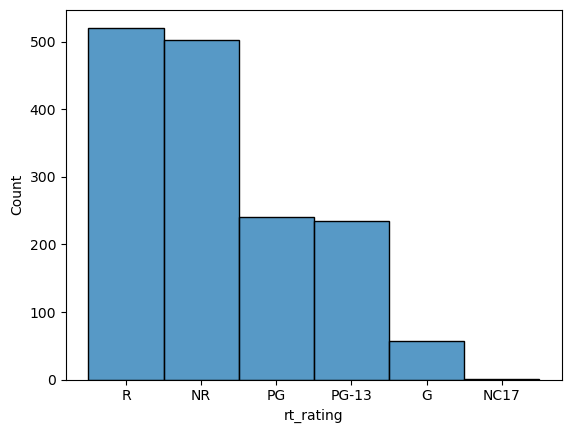

In [25]:
sns.histplot(data=rt_info_cp['rt_rating'])

-----------------------------

## IMDB Data, SQL Cleaning and Understanding 

In [26]:
movie_basics = imdb_tables['movie_basics'].copy(deep=True)
movie_basics.shape
movie_basics.head()
movie_basics.info()
movie_basics.describe()
movie_basics.columns
print(movie_basics.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [27]:
movie_basics 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [28]:
movie_basics = movie_basics.rename(columns={
    "original_title": "movie_title",
    "runtime_minutes":"movie_runtime_mins"  
})

median_runtime = movie_basics['movie_runtime_mins'].median()
movie_basics['movie_runtime_mins'] = movie_basics['movie_runtime_mins'].fillna(median_runtime)
movie_basics['movie_title'] = movie_basics['movie_title'].fillna('Unknown')
movie_basics['genres'] = movie_basics['genres'].fillna("Unknown")


In [29]:
movie_basics.isna().sum()


movie_id              0
primary_title         0
movie_title           0
start_year            0
movie_runtime_mins    0
genres                0
dtype: int64

In [30]:
movie_basics

,movie_id,primary_title,movie_title,start_year,movie_runtime_mins,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Unknown


In [31]:
#Detecting Outliers 
movie_basics['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027])

<Axes: xlabel='start_year'>

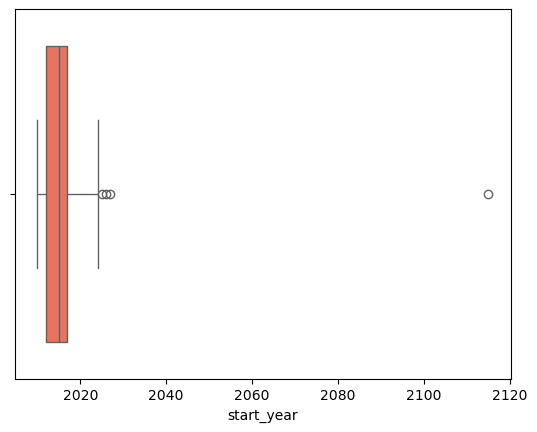

In [32]:
sns.boxplot(x= movie_basics['start_year'], color='tomato')

### Observation

In [33]:
movie_basics[movie_basics['start_year'] == 2115]


,movie_id,primary_title,movie_title,start_year,movie_runtime_mins,genres
89506,tt5174640,100 Years,100 Years,2115,87.0,Drama


### The outliers are genuine

*"100 Years"* is a real film directed by **Robert Rodriguez** and starring **John Malkovich**, but it's part of an experimental project:

> The movie was created in **2015** and is locked in a time-sealed vault, scheduled to premiere **100 years later**, in **2115**.

### Why?

It was made as part of a marketing collaboration with **Louis XIII Cognac**, which is itself aged 100 years. The film's concept mirrors that — no one alive today (probably) will get to see it.

- The movie is stored in a **high-tech time-lock safe**.
- Only a few people received tickets to the 2115 screening 
- No trailers, no screenshots — it's completely hidden until release.


## For analysis we will stick to only realeased movies

In [34]:
movie_basics = movie_basics[movie_basics['start_year'] <= 2025]

<Axes: xlabel='movie_runtime_mins'>

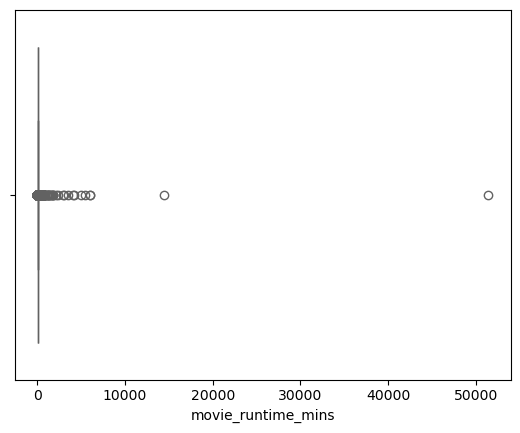

In [35]:
sns.boxplot(x= movie_basics['movie_runtime_mins'], color='tomato')

In [36]:
movie_basics['movie_runtime_mins'].sort_values(ascending=False)

132389    51420.0
44840     14400.0
123467     6017.0
87264      6000.0
88717      5460.0
           ...   
72190         1.0
95787         1.0
98755         1.0
136059        1.0
140571        1.0
Name: movie_runtime_mins, Length: 146141, dtype: float64

In [37]:
runtimes = movie_basics[movie_basics['movie_runtime_mins'].between(6000, 52000)]
(runtimes)

,movie_id,primary_title,movie_title,start_year,movie_runtime_mins,genres
44840,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary
87264,tt5068890,Hunger!,Hunger!,2015,6000.0,"Documentary,Drama"
123467,tt7492094,Nari,Nari,2017,6017.0,Documentary
132389,tt8273150,Logistics,Logistics,2012,51420.0,Documentary


In [38]:
runtimes = movie_basics[movie_basics['movie_runtime_mins'].between(1, 5)]
runtimes

,movie_id,primary_title,movie_title,start_year,movie_runtime_mins,genres
1734,tt10160946,New York City Pizza Parlors,New York City Pizza Parlors,2018,5.0,Documentary
1757,tt10163274,Shower Thoughts,Shower Thoughts,2019,4.0,"Comedy,Drama,Thriller"
2278,tt10229632,Interiors,Interiors,2018,4.0,Documentary
2556,tt10263670,The 49th Day,The 49th Day,2019,5.0,"Animation,Fantasy"
2570,tt10265824,Lamentation For Little Girls Who Are In Love W...,Lamentation For Little Girls Who Are In Love W...,2019,1.0,Animation
...,...,...,...,...,...,...
143078,tt9465358,All Night Bender (No Surrender),All Night Bender (No Surrender),2018,5.0,"Documentary,News"
143146,tt9475908,Rhonda's Treasures,Rhonda's Treasures,2018,4.0,Documentary
143661,tt9563288,The Peony Pavilion,The Peony Pavilion,2017,4.0,"Animation,Short"
143717,tt9572670,Hidden Stars of Hollywood II - Laurel Paley,Hidden Stars of Hollywood II - Laurel Paley,2018,4.0,"Biography,Documentary"


## 🎥 Runtime Outliers: Are These Ultra-Long Films Real?

While exploring `movie_runtime_mins`, we found a few movies with **extremely long runtimes**. Here are some standout examples:

| Title                    | Runtime (mins) | Runtime (hrs) | Real? | Notes |
|--------------------------|----------------|----------------|-------|-------|
| **Logistics** (2012)     | 51,420         | ~857 hrs       | Yes | World's longest film (35 days long) |
| **Modern Times Forever** (2011) | 14,400         | 240 hrs         | Yes | 10-day long art film shown once in Helsinki |
| **Nari** (2017)          | 6,017          | ~100 hrs       | Seems Real | Likely an experimental or installation piece |
| **Hunger!** (2015)       | 6,000          | 100 hrs        |    Unverified | May be a mislabeled or fringe project |

---

### 🔍 Details

- **Logistics**: Swedish experimental film by Erika Magnusson & Daniel Andersson. It follows the life cycle of a pedometer in real-time, running 35 days long. Often cited as the longest film ever made.
- **Modern Times Forever**: An art film by Danish group Superflex. Simulates the decay of a building over millennia, shown on the side of the actual building for 10 days straight.
- **Nari**: Little public documentation, but appears to be a long-form documentary or installation-style video.
- **Hunger!**: Hard to verify — possibly an error or fringe production. No major sources confirm its runtime.

---



## 🎞️ Are These 1–5 Minute Films Real?

We discovered 459 entries in our dataset with runtimes between **1 and 5 minutes**. Here's a sample:

| Title                                          | Year | Runtime | Genre                          |
|------------------------------------------------|------|---------|--------------------------------|
| New York City Pizza Parlors                   | 2018 | 5       | Documentary                    |
| Shower Thoughts                                | 2019 | 4       | Comedy, Drama, Thriller        |
| Lamentation for Little Girls...               | 2019 | 1       | Animation                      |
| Rhonda's Treasures                              | 2018 | 4       | Documentary                    |
| The Tale of Two Deaf Travellers                | 2018 | 5       | Adventure, Biography, Documentary |




###  Are They Real?
**Yes, absolutely.** These are:
- **Short films** featured in film festivals
- **Documentaries** and experimental projects
- **Animation shorts** often created by indie studios or students

IMDb includes these kinds of entries because it catalogs **all forms of cinematic content**, not just theatrical releases.

## 🎬 Are These 5–20 Minute Films Real?

While exploring runtimes, we found a group of movies with durations between **5 and 20 minutes**. For example:

| Title                                 | Year | Runtime (mins) | Genre                       |
|---------------------------------------|------|----------------|-----------------------------|
| Empty Temple                          | 2018 | 13             | Documentary, History        |
| Nuit                                  | 2019 | 15             | Documentary                 |
| Shifting Gears II                     | 2019 | 20             | Documentary                 |
| The Tale of Two Deaf Travellers       | 2018 | 5              | Adventure, Biography, Doc   |
| Lala's World                          | 2018 | 13             | Documentary                 |

###  Are They Real?
**Yes, these are real.** Many are **short films**, **documentaries**, or **independent festival entries**. Film databases like IMDb include **all lengths of productions**, including:
- Short films (common at film festivals and on platforms like Vimeo or YouTube)
- Student or independent projects
- Episodic anthologies or proof-of-concept pilots


## 🎬 Average Runtime of Commercial Movies

| **Type of Movie**          | **Average Runtime** | **Notes**                                              |
|---------------------------|----------------------|--------------------------------------------------------|
| **Hollywood (modern)**    | ~100–120 min         | Most theatrical releases fall in this range            |
| **Blockbusters**          | ~130–150 min         | Big-budget films like Marvel, Nolan, Dune, etc.        |
| **Animated Films**        | ~80–100 min          | Often shorter and more accessible for younger viewers  |
| **Comedies / Rom-Coms**   | ~90–105 min          | Light pacing, quicker narratives                       |
| **Dramas / Thrillers**    | ~110–130 min         | More narrative depth and complexity                    |
| **Documentaries**         | ~70–90 min           | Varies widely depending on topic and distribution      |
| **Indie Films**           | ~85–110 min          | Tighter edits due to budget and scope constraints      |
| **Short Films**           | < 40 min             | Not usually released commercially                      |

---

### 🎥 Quick Insights

- The **Academy of Motion Picture Arts and Sciences** defines a feature film as **40 minutes or longer**.
- Modern theatrical films have **gradually increased in length** over the past few decades.
- For most box office movies, a runtime between **90 to 120 minutes** is considered the sweet spot.


### For analysis we will subset data between 40 and 160


In [39]:
movie_basics = movie_basics[movie_basics['movie_runtime_mins'].between(40, 150)]

In [40]:
movie_basics.shape
movie_basics.isna().any()

movie_id              False
primary_title         False
movie_title           False
start_year            False
movie_runtime_mins    False
genres                False
dtype: bool

In [41]:
movie_ratings = imdb_tables['movie_ratings']

movie_ratings.info()
movie_ratings.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


np.int64(0)

In [42]:
movie_ratings.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

## ratings table is clean we merged it onto the basics table

merging using a left merge resulted to high missingness in some columns, despite keeping all the data, any attempt to impute with statistical methods will obviously lead to data bias
we merged using inner merge but this led to loss of 49% of the data but with complete entries

In [43]:
movie_df = movie_basics.merge(movie_ratings, on='movie_id', how='inner')

## People(Tables that contain human data) related tables were fairly clean, though minimal cleaning is requered then intended merging will be executed to get a larger and richer data frame?

## Persons

In [44]:
persons = imdb_tables['persons'].copy(deep=True)
persons.shape
persons.head()
persons.info()
persons.describe()
persons.columns
print(persons.isna().sum())

persons


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [45]:
persons = persons.drop(columns=['birth_year', 'death_year'])

In [46]:
persons['primary_profession'] = persons['primary_profession'].fillna("Unknown")

In [47]:
persons.isna().any()

person_id             False
primary_name          False
primary_profession    False
dtype: bool

In [48]:
directors = imdb_tables['directors'].copy(deep=True)
directors.shape
directors.isna().any()
directors.duplicated().sum()
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


### Merging directors to people, since our primary objective is to link it with the movies,we will use an inner join,and will drop duplicate via the movie id, since one person can be involved =in many movies


### Result a complete combined table with no duplicate movies

In [49]:
persons_df = persons.merge(directors, on='person_id', how='inner')
persons_df = persons_df.drop_duplicates(subset='movie_id')
persons_df

,person_id,primary_name,primary_profession,movie_id
0,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt1592569
4,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt8421806
6,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt2057445
9,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous",tt2590280
10,nm0064023,Bryan Beasley,"director,producer,writer",tt4512140
...,...,...,...,...
291163,nm9964916,Rich Allen,"director,actor,writer",tt8685584
291164,nm9971456,Zheng Wei,director,tt8697720
291165,nm9980896,Rama Narayanan,"director,writer",tt8715016
291167,nm9980896,Rama Narayanan,"director,writer",tt8919136


### We will now merge this to the movies df to get a bigger picture

In [50]:
imdb_full = movie_df.merge(persons_df, on="movie_id", how='left')
imdb_full = imdb_full.dropna()

In [51]:
imdb_full

,movie_id,primary_title,movie_title,start_year,movie_runtime_mins,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,"director,writer,actor"
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0000080,Orson Welles,"actor,director,writer"
2,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13,nm0611531,Hrishikesh Mukherjee,"director,editor,writer"
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,nm0749914,Raoul Ruiz,"director,writer,producer"
4,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.1,32,nm6883878,Mc Jones,"actor,director"
...,...,...,...,...,...,...,...,...,...,...,...
72222,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,nm0812850,Giancarlo Soldi,"director,writer,producer"
72223,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,nm4394529,Ahmet Faik Akinci,"director,writer"
72224,tt9914642,Albatross,Albatross,2017,87.0,Documentary,8.5,8,nm5300859,Chris Jordan,"director,writer,editor"
72225,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,87.0,Unknown,6.6,5,nm1716653,Laura Jou,"miscellaneous,actress,director"


### 🎯 Objective of the Analysis

The main objective of this analysis is to provide **concrete, data-driven recommendations** that will enable our stakeholders to enter the movie production market **profitably and strategically**.

To achieve this, we must **systematically merge and analyze multiple datasets** — including financials, audience ratings, genres, runtimes, release dates, and more — to uncover valuable insights about:

- What types of movies perform best
- How budget and timing affect profitability
- Which factors can help mitigate financial risk

---

### 🔄 Challenges and Trade-offs

One major challenge in this process is that merging **multiple, disparate datasets** (from Box Office Mojo, IMDb, Rotten Tomatoes, TMDb, and The Numbers) can lead to **data loss**, especially when:

- Unique movie IDs do not align perfectly across sources
- Some datasets contain incomplete or missing values
- Not all films exist in every dataset

However, this trade-off is **strategic and necessary**. While we may sacrifice some granularity or sample size, we gain a **richer, more holistic financial perspective** by combining data from different platforms.

---

### 💡 The Big Picture

Even if we don’t capture *every* film in the industry, a well-curated merged dataset will allow us to:

- Identify **profitable trends**
- Recommend **high-ROI genres and budgets**
- Pinpoint **ideal release windows**
- Assess **risk and reward across film types**

By prioritizing **actionable insights over raw completeness**, this analysis aims to give our stakeholders a strong head start — if not the full picture, then at least the **right picture** — to confidently enter and compete in the movie market.


-------------------------------

## 📊 Univariate Analysis

Univariate analysis focuses on understanding the **distribution and behavior of individual variables** in our dataset. This step helps us identify key trends, outliers, and data quality issues before performing more complex multivariate analysis.

We will analyze variables such as:

- **Movie runtime** — to detect typical lengths and extreme values.
- **Release year** — to observe trends over time.
- **Genres** — to identify popular categories.
- **Revenue and budgets** — to examine profitability potential.
- **Ratings and votes** — to assess audience reception.

This foundational step is essential for spotting patterns and guiding the direction of deeper insights later in the analysis.

### 1.) `start_year`: understanding the trajectory of film production volume over time

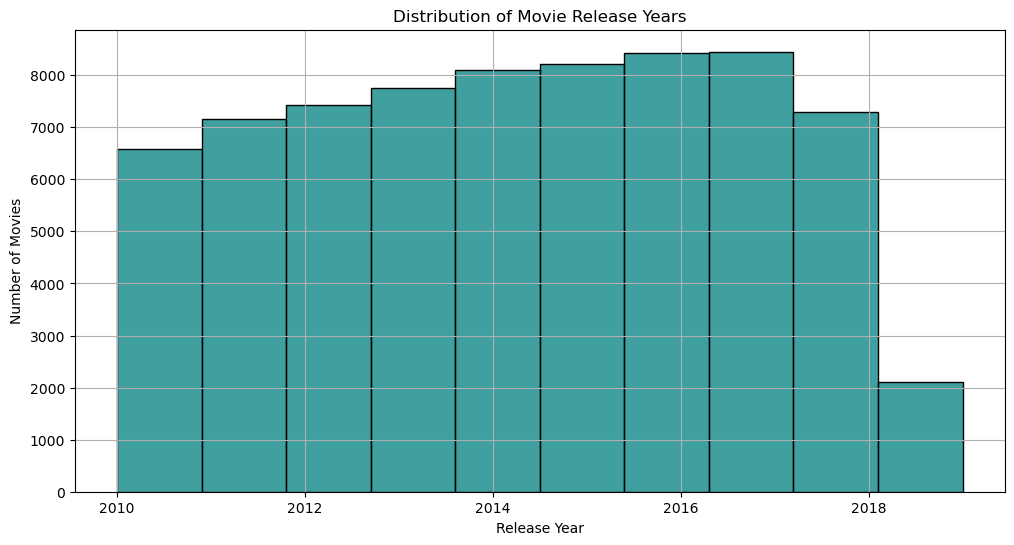

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(data=imdb_full, x='start_year', bins=10, color='teal')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

##  Observation: Movie Production Trends Over Time

The data reveals a **general upward trend in movie production**, peaking around **2017**. This rise can likely be attributed to several factors:

- Increasing demand for entertainment globally
- The boom of **online streaming platforms** such as Netflix and Amazon Prime
- Lower barriers to entry for independent filmmakers

However, from **2018 onwards**, there is a **noticeable decline** in movie production. This sharp drop is primarily due to the **COVID-19 pandemic**, which disrupted global film production, distribution, and theatrical releases.

While the dataset lacks substantial entries beyond **2019**, making it difficult to draw data-driven conclusions about recent years, it's reasonable to **intuitively expect a rebound** in production due to:

- The global **resumption of production activities**
- Continued **adoption and growth of streaming platforms**
- Evolving consumer preferences favoring digital content consumption

Further analysis using more recent datasets could help confirm this expected post-pandemic recovery trend.



## 2) Understanding the distribution of movie runtimes

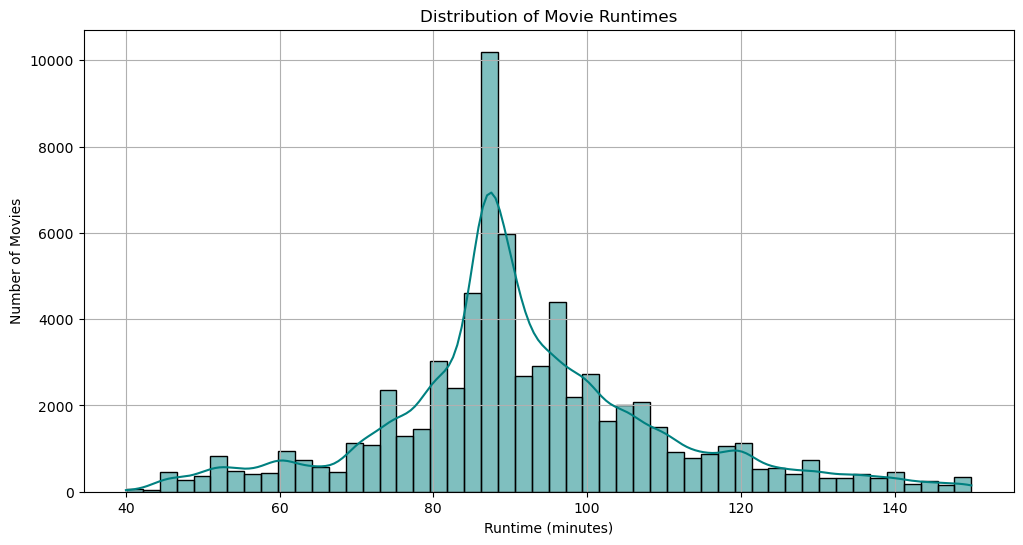

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(data=imdb_full, x='movie_runtime_mins', bins=50, kde=True, color='teal')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

## **Observations**

- The majority of movies fall within the **80 to 120 minute** range.  
- This aligns with standard **commercial feature-length films**.  
- A smaller number of movies fall outside this range:
  - Films **under 40 minutes** are typically considered **short films**.  
  - Exceptionally **long runtimes** often indicate **experimental projects** or **documentaries**.


## 3.) What are the Most Common movie genres?

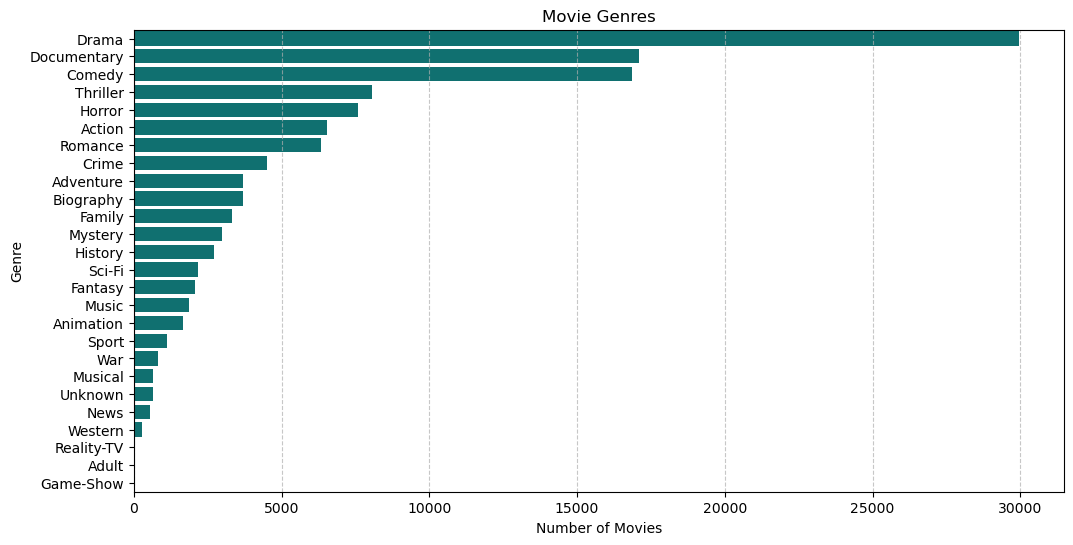

In [54]:
df_genres = imdb_full.dropna(subset=['genres']).copy()

df_genres['genres'] = df_genres['genres'].str.split(',')
df_genres = df_genres.explode('genres')


genre_counts = df_genres['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(12,6))
sns.barplot(data=genre_counts, x='Count', y='Genre', color='teal')
plt.title('Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

###  Observations:

- **Drama** dominates the genre landscape — a reflection of our intrinsic human connection to storytelling, emotion, and interpersonal conflict.
- **Documentaries** come in second, indicating a broad curiosity for real-life events and insights — from scientific topics to deep societal issues.
- Surprisingly, **Comedy** surpasses **Action** in frequency. While action films have global appeal, it seems that over time, audiences tend to gravitate back to grounded genres like **drama**, **comedy**, and **thrillers**.
- **Action** films, often popular with younger audiences and international markets, trail behind, possibly due to genre blending or changes in market saturation.
- **Niche genres** like **War**, **Sport**, and **Western** appear far less frequently — likely due to their targeted audience and specific thematic focus.

This genre distribution offers valuable guidance for stakeholders looking to align film production with audience interest and market demand.


## 3.) What is the moving rating distribution? hence Knowing the expected base performace 

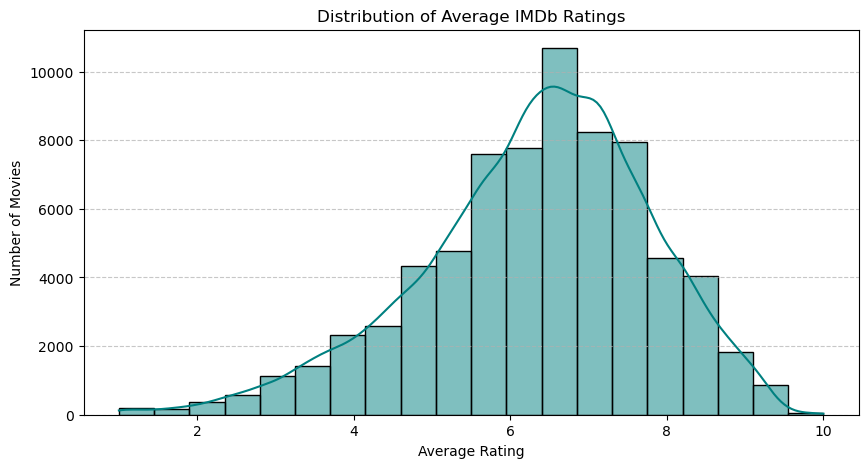

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(data=imdb_full, x='averagerating', bins=20, kde=True, color='teal')
plt.title('Distribution of Average IMDb Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


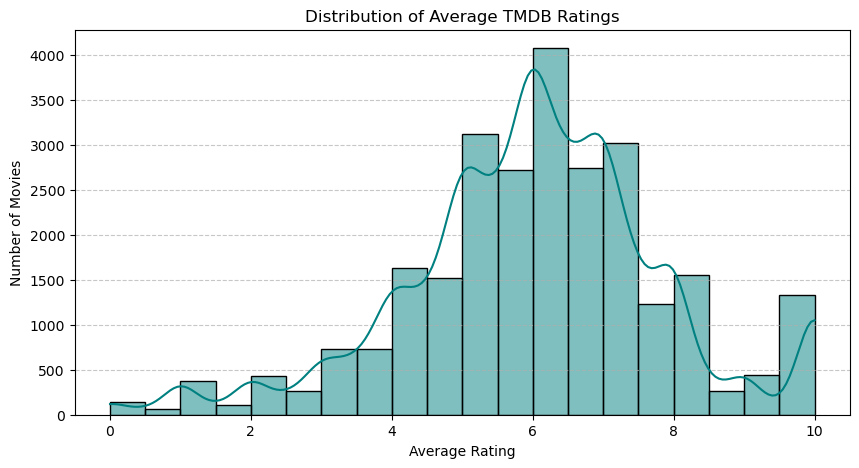

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(data=tmdb, x='vote_average', bins=20, kde=True, color='teal')
plt.title('Distribution of Average TMDB Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

###  Observations: Using IMDB and TMDB

- Most movies cluster within the **6 to 8 rating range**, indicating that the majority of films are received as **average to good** by audiences.
- Ratings **above 8** are relatively rare and signal **exceptional performance**, both in terms of quality and audience reception.
- While ratings alone can't dictate success, it’s a fair assumption — and widely accepted industry knowledge — that a movie **should aim for a minimum rating within the 6–8 range** to be considered well-received.
- On the **extremes of the distribution**, we find:
  - A **small number of poorly rated films** (ratings < 4), which are often critically or commercially unsuccessful.
  - A **rare class of highly rated films** (ratings > 8), typically considered classics or cult favorites.
- The **tails being thin** suggests that **extremely good or bad movies are uncommon** — most productions fall somewhere in the middle.

While rating is only one piece of the puzzle, it will serve as a key **qualitative metric**. In further analysis, we will combine this with **financial performance data** to better understand what makes a movie both **critically acclaimed and profitable**, thus guiding our recommendations.


## 4.) What is the most common language? 

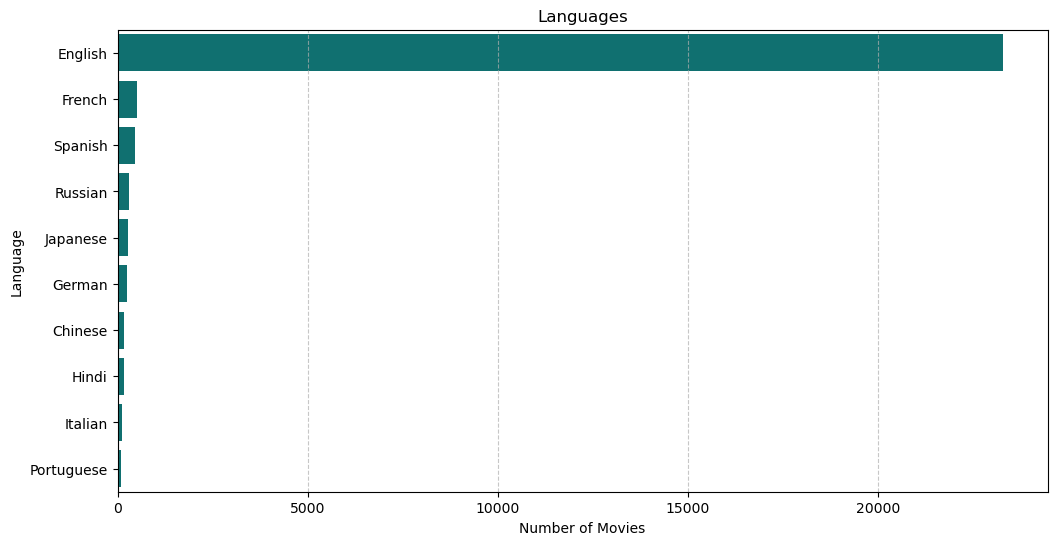

In [57]:
language_counts = tmdb['original_language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

plt.figure(figsize=(12,6))
sns.barplot(data=language_counts.head(10), x='Count', y='Language', color='teal')
plt.title('Languages')
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

### Observations:

- **English overwhelmingly dominates** as the original language of movies in the dataset.
- This is likely due to several key factors:
  - **Global acceptance**: English is widely spoken and understood around the world.
  - **Industry standard**: Many of the world’s largest studios operate in English-speaking countries, making it the default for international releases.
  - **Production efficiency**: It's often **cheaper and more practical** to produce films in English rather than training actors to speak another language.
  - **Creative logistics**: From **scriptwriting** to **direction and acting**, operating in English minimizes complexity and reduces overhead.
- For non-English-speaking audiences, solutions like **subtitles** and increasingly advanced **dubbing technology** make English-language films more accessible — broadening their market without needing multilingual production.

In essence, English films offer a **universal baseline** for distribution and production efficiency, making them a safer and more cost-effective choice for studios aiming for global reach.


## 5.) Whats the budget distribution, hence indicating a strategic investment figures

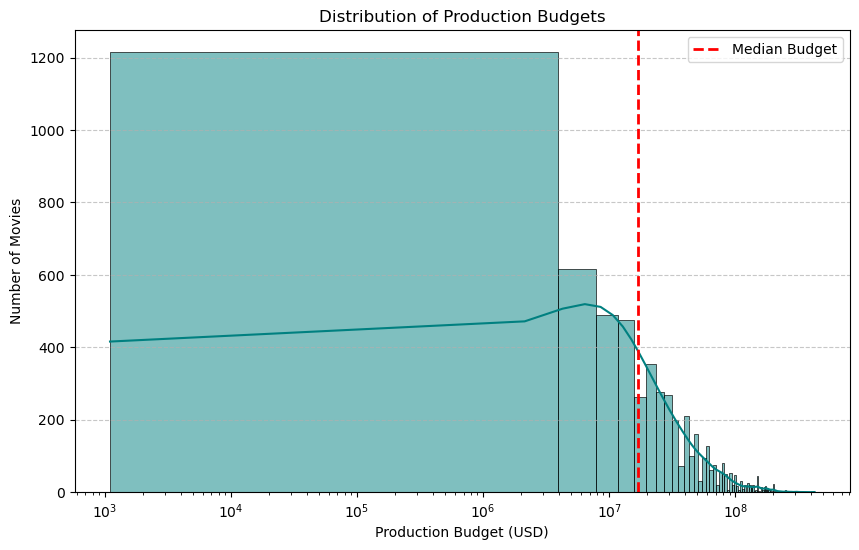

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(budget_df['production_budget'], bins='auto', kde=True, color='teal')
plt.axvline(budget_df['production_budget'].median(), color='red', linestyle='--', linewidth=2, label='Median Budget')
plt.title('Distribution of Production Budgets')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Number of Movies')
plt.xscale('log')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


### Observations

- The majority of films have a **production budget between $1,000 (10³) and $10 million (10⁷)**.
- The **median budget** lies **slightly above $10 million**, but **well below $100 million (10⁸)**, suggesting that most commercial films don’t require massive investments to be viable.
- There are, of course, **extreme outliers** — big-budget films typically produced by **established studios** with global anticipation (e.g., franchise sequels, blockbuster releases).
- For **first-time or new investors/studios**, it is **strategic to stay within the 10³ to 10⁷ USD range**, as this reflects the base-level budget where most films are being made.


## 6.) What is the Distribution of domestic and Forign gross? 

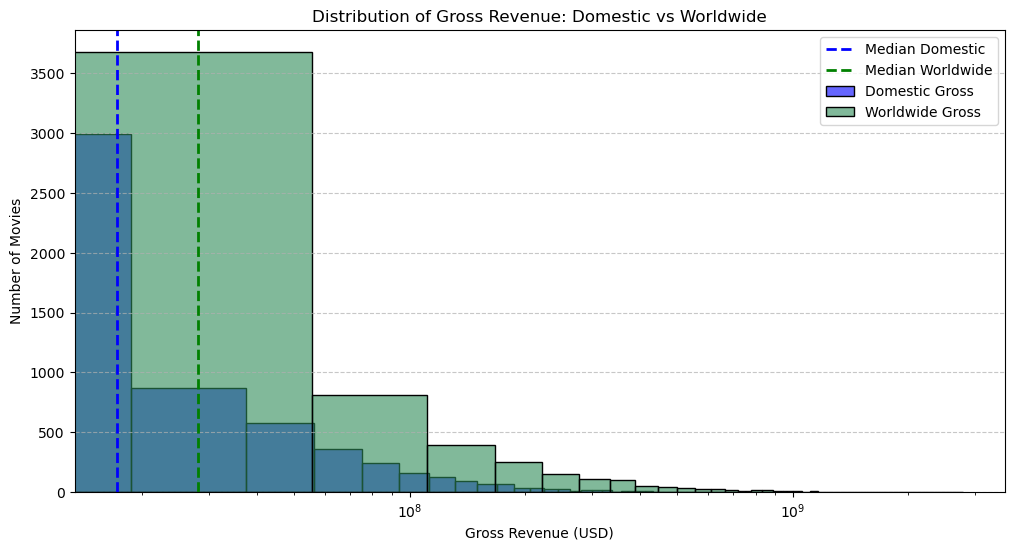

In [59]:
plt.figure(figsize=(12,6))

# Domestic Gross
sns.histplot(budget_df['domestic_gross'], bins=50, kde=False, color='blue', label='Domestic Gross', alpha=0.6)

# Worldwide Gross
sns.histplot(budget_df['worldwide_gross'], bins=50, kde=False, color='seagreen', label='Worldwide Gross', alpha=0.6)

# Median Lines
plt.axvline(budget_df['domestic_gross'].median(), color='blue', linestyle='--', linewidth=2, label='Median Domestic')
plt.axvline(budget_df['worldwide_gross'].median(), color='green', linestyle='--', linewidth=2, label='Median Worldwide')

plt.title('Distribution of Gross Revenue: Domestic vs Worldwide')
plt.xlabel('Gross Revenue (USD)')
plt.ylabel('Number of Movies')
plt.xscale('log')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()




### Observation: Domestic vs Worldwide Gross Revenue

As expected, the **worldwide gross consistently outperforms domestic gross**, and this is clearly supported by the **distribution plot and median values**. The **median worldwide gross** is significantly higher than the **median domestic gross**, indicating that most films earn more when released globally rather than only within their home markets.

This makes sense when we consider:

*  **Global Reach**: Releasing movies across international markets opens access to a much larger audience.
*  **Revenue Diversification**: Different regions have different entertainment appetites, increasing chances of success beyond domestic limits.
*  **Marketing and Distribution Power**: Especially for big-budget films, studios invest in global marketing campaigns and localized distribution strategies.
*  **Cultural Appeal**: Genres like action, animation, and sci-fi often transcend language and cultural barriers, performing well worldwide.
*  **Localization**: With the rise of **dubbing and subtitles**, non-English-speaking regions are more accessible than ever, making global earnings more feasible.
